<a href="https://colab.research.google.com/github/shamiya829/spe-ml-challenge/blob/main/fervo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


train_data_1 = pd.read_csv('Training_dataset_1.csv')
train_data_2 = pd.read_csv('Training_dataset_2.csv')
train_data_3 = pd.read_csv('Training_dataset_3.csv')

In [4]:
# Assuming train_data_1, train_data_2, and train_data_3 are loaded separately
train_data_1['Well'] = 'Well_1'
train_data_2['Well'] = 'Well_2'
train_data_3['Well'] = 'Well_3'

# Concatenate the datasets along the rows (axis=0)
train_data = pd.concat([train_data_1, train_data_2, train_data_3], axis=0)

# Reset the index after concatenation
train_data.reset_index(drop=True, inplace=True)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13403 entries, 0 to 13402
Data columns (total 90 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   AD Delta-P SP (psi)                     13403 non-null  float64
 1   AD ROP SP (ft/hr)                       13403 non-null  float64
 2   AD Torque SP (kft·lbf)                  13403 non-null  float64
 3   AD WOB SP (klb)                         13403 non-null  float64
 4   Accum Trip In (bbl)                     13402 non-null  float64
 5   Accum Trip Out (bbl)                    13402 non-null  float64
 6   Annular Velocity (ft/min)               13402 non-null  float64
 7   BHA Length (ft)                         13402 non-null  float64
 8   Bit MSE (psi)                           13402 non-null  float64
 9   Bit Position (ft)                       13401 non-null  float64
 10  Bit RPM (RPM)                           13401 non-null  fl

In [6]:
# missing values
train_data.isnull().sum()

,0
AD Delta-P SP (psi),0
AD ROP SP (ft/hr),0
AD Torque SP (kft·lbf),0
AD WOB SP (klb),0
Accum Trip In (bbl),1
...,...
WC Bit Weight (klb),3
WC Torque (ft·lbf),3
Washout Factor (),3
Water Pit (bbl),3


In [7]:
train_data.describe()

,AD Delta-P SP (psi),AD ROP SP (ft/hr),AD Torque SP (kft·lbf),AD WOB SP (klb),Accum Trip In (bbl),Accum Trip Out (bbl),Annular Velocity (ft/min),BHA Length (ft),Bit MSE (psi),Bit Position (ft),...,Total Gas (ML) (lagged) (1%=100 Units),Total Rotations on DP (),Total Trip Volume (bbl),Trip Tank 1 (bbl),Trip Tank 2 (bbl),Trip Tank GL (bbl),WC Bit Weight (klb),WC Torque (ft·lbf),Washout Factor (),Water Pit (bbl)
count,13403.000000,13403.000000,13403.000000,13403.000000,13402.000000,13402.000000,13402.000000,13402.000000,1.340200e+04,13401.000000,...,13401.00,13401.000000,13401.000000,13401.000000,13401.000000,13401.000000,13400.000000,13400.000000,13400.000000,13400.000000
mean,635.950453,309.514064,20.514810,29.347887,6.369572,673.594613,69.617274,1138.005522,1.282887e+04,2820.078298,...,-999.25,496.873392,24.369898,11.461607,12.870905,1.485486,-79.277595,8.395896,3.304509,277.278358
std,235.359483,99.468369,6.283293,15.120402,7.414596,468.009498,197.358094,316.230362,3.737350e+04,1463.335701,...,0.00,340.633050,13.994454,6.976145,7.158247,16.366669,25.170082,5.550754,0.503666,69.533794
min,-999.250000,50.000000,4.000000,4.000000,0.000000,0.000000,-999.250000,178.900000,-1.283754e+05,1.000000,...,-999.25,0.000000,1.000000,1.000000,0.000000,-35.000000,-160.000000,-6.000000,0.000000,59.000000
25%,500.000000,215.000000,18.000000,15.000000,0.000000,182.000000,88.300000,1228.600000,2.491065e+03,1677.960000,...,-999.25,219.660000,7.000000,2.000000,6.000000,-2.000000,-95.920000,4.000000,2.990000,231.000000
50%,625.000000,325.000000,20.000000,25.000000,0.000000,945.000000,88.900000,1231.000000,7.928720e+03,2805.950000,...,-999.25,482.940000,36.000000,17.000000,19.000000,0.000000,-85.000000,8.000000,3.280000,279.000000
75%,800.000000,400.000000,23.000000,45.000000,15.000000,1046.000000,97.700000,1311.400000,1.854201e+04,3922.980000,...,-999.25,696.560000,36.000000,17.000000,19.000000,12.000000,-69.887500,13.000000,3.540000,332.000000
max,1050.000000,500.000000,30.000000,64.000000,15.000000,1172.000000,212.600000,1311.400000,3.968222e+06,5821.900000,...,-999.25,1684.170000,40.000000,19.000000,21.000000,27.000000,15.270000,24.000000,6.560000,401.000000


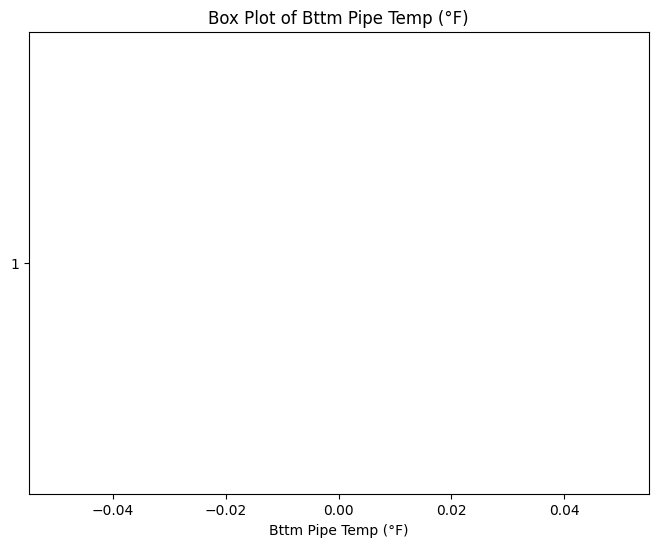

In [8]:
Q1 = train_data['Bttm Pipe Temp (°F)'].quantile(0.25)
Q3 = train_data['Bttm Pipe Temp (°F)'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_data[(train_data['Bttm Pipe Temp (°F)'] < (Q1 - 1.5 * IQR)) |
                      (train_data['Bttm Pipe Temp (°F)'] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(8, 6))
plt.boxplot(train_data['Bttm Pipe Temp (°F)'], vert=False, showfliers=True)
plt.xlabel('Bttm Pipe Temp (°F)')
plt.title('Box Plot of Bttm Pipe Temp (°F)')
plt.show()

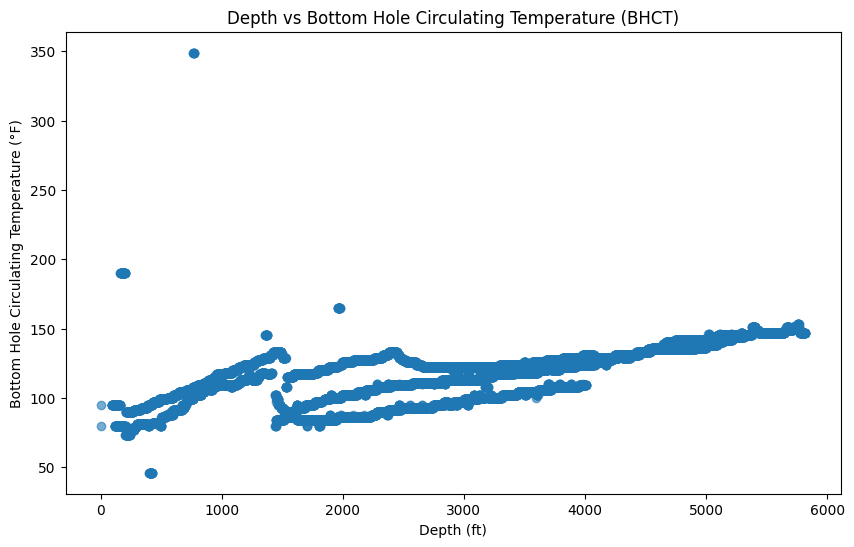

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Depth(ft)'], train_data['Bttm Pipe Temp (°F)'], alpha=0.6)
plt.xlabel('Depth (ft)')
plt.ylabel('Bottom Hole Circulating Temperature (°F)')
plt.title('Depth vs Bottom Hole Circulating Temperature (BHCT)')
plt.show()

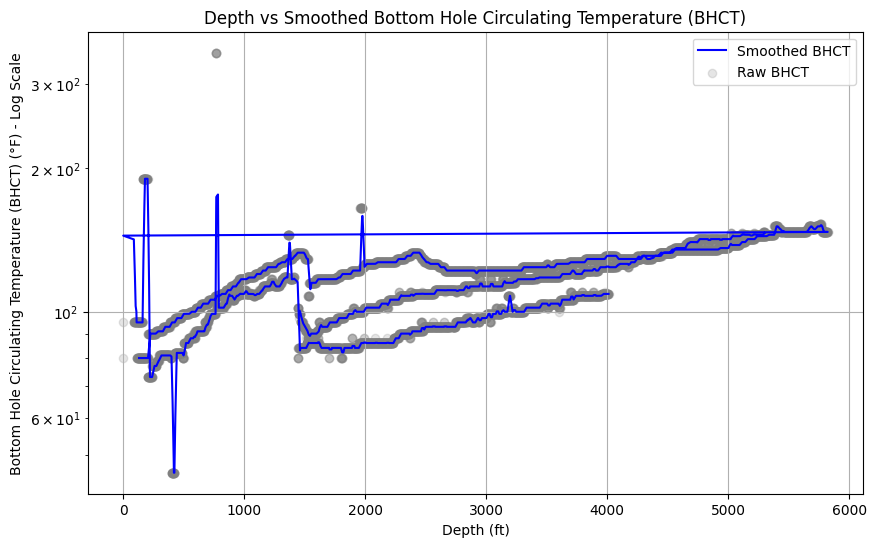

In [10]:

train_data['Rolling_Mean_BHCT'] = train_data['Bttm Pipe Temp (°F)'].rolling(window=20).mean()

# Plot with logarithmic scale on y-axis
plt.figure(figsize=(10, 6))
plt.plot(train_data['Depth(ft)'], train_data['Rolling_Mean_BHCT'], color='b', label='Smoothed BHCT')
plt.scatter(train_data['Depth(ft)'], train_data['Bttm Pipe Temp (°F)'], alpha=0.2, color='gray', label='Raw BHCT')
plt.yscale('log')  # Log scale for y-axis to better handle wide value range
plt.xlabel('Depth (ft)')
plt.ylabel('Bottom Hole Circulating Temperature (BHCT) (°F) - Log Scale')
plt.title('Depth vs Smoothed Bottom Hole Circulating Temperature (BHCT)')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you already have the data loaded as `train_data`
# Apply rolling mean for smoothing
train_data['Rolling_Mean_BHCT'] = train_data['Bttm Pipe Temp (°F)'].rolling(window=20).mean()

# Add a third variable, e.g., 'Pressure' (Replace with any relevant parameter from your dataset)
# For the sake of the example, let's assume the 'Pressure' column exists
train_data['Pressure'] = train_data['Depth(ft)'] * 0.1  # Just an example, replace with actual data

# Create the 3D plot
fig = go.Figure()

# Add Smoothed BHCT as a 3D scatter plot
fig.add_trace(go.Scatter3d(
    x=train_data['Depth(ft)'],
    y=train_data['Bttm Pipe Temp (°F)'],
    z=train_data['Pressure'],
    mode='markers',
    marker=dict(
        size=4,
        color=train_data['Bttm Pipe Temp (°F)'],  # Color by BHCT for better insight
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Smoothed BHCT'
))

# Add Smoothed BHCT (Rolling Mean) as a line in 3D
fig.add_trace(go.Scatter3d(
    x=train_data['Depth(ft)'],
    y=train_data['Rolling_Mean_BHCT'],
    z=train_data['Pressure'],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Smoothed BHCT (Rolling Mean)'
))

# Update layout for the 3D plot
fig.update_layout(
    title='3D View of Depth, BHCT, and Pressure',
    scene=dict(
        xaxis_title='Depth (ft)',
        yaxis_title='Bottom Hole Circulating Temperature (°F)',
        zaxis_title='Pressure (psi)',  # Replace 'Pressure' with another parameter if needed
    ),
    template='plotly_dark',
    hovermode='closest'
)

# Show the interactive 3D plot
fig.show()


In [12]:
import plotly.graph_objects as go
import pandas as pd

# Assuming your data is loaded and has a 'Well' column that identifies each well
# Apply rolling mean for smoothing if needed
train_data['Rolling_Mean_BHCT'] = train_data['Bttm Pipe Temp (°F)'].rolling(window=20).mean()

# Create the figure
fig = go.Figure()

# For each well, plot Depth vs BHCT (raw and smoothed)
wells = train_data['Well'].unique()  # Assuming 'Well' is a column identifying each well

for well in wells:
    well_data = train_data[train_data['Well'] == well]

    # Add raw BHCT (gray dots) for each well
    fig.add_trace(go.Scatter(
        x=well_data['Depth(ft)'],
        y=well_data['Bttm Pipe Temp (°F)'],
        mode='markers',
        name=f'Raw BHCT - {well}',
        marker=dict(color='gray', opacity=0.4)
    ))

    # Add smoothed BHCT (blue line) for each well
    fig.add_trace(go.Scatter(
        x=well_data['Depth(ft)'],
        y=well_data['Rolling_Mean_BHCT'],
        mode='lines',
        name=f'Smoothed BHCT - {well}',
        line=dict(width=2)
    ))

# Update layout for the plot
fig.update_layout(
    title='Depth vs Bottom Hole Circulating Temperature (BHCT) by Well',
    xaxis_title='Depth (ft)',
    yaxis_title='Bottom Hole Circulating Temperature (BHCT) (°F)',
    template='plotly_dark',
    hovermode='closest',
    showlegend=True
)

# Show the interactive plot
fig.show()


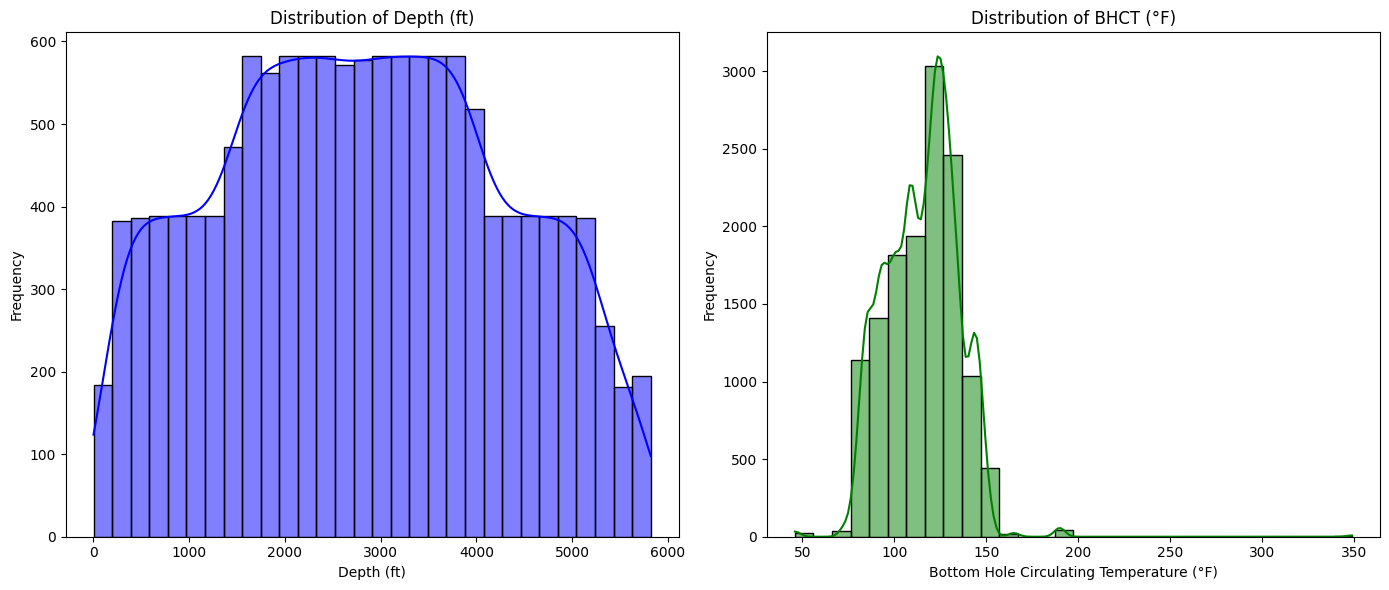

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# depth
plt.subplot(1, 2, 1)
sns.histplot(train_data['Depth(ft)'], kde=True, color='blue', bins=30)
plt.title('Distribution of Depth (ft)')
plt.xlabel('Depth (ft)')
plt.ylabel('Frequency')

# BHCT
plt.subplot(1, 2, 2)
sns.histplot(train_data['Bttm Pipe Temp (°F)'], kde=True, color='green', bins=30)
plt.title('Distribution of BHCT (°F)')
plt.xlabel('Bottom Hole Circulating Temperature (°F)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
